In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
df = pd.read_csv('cement_slump.csv')

In [36]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

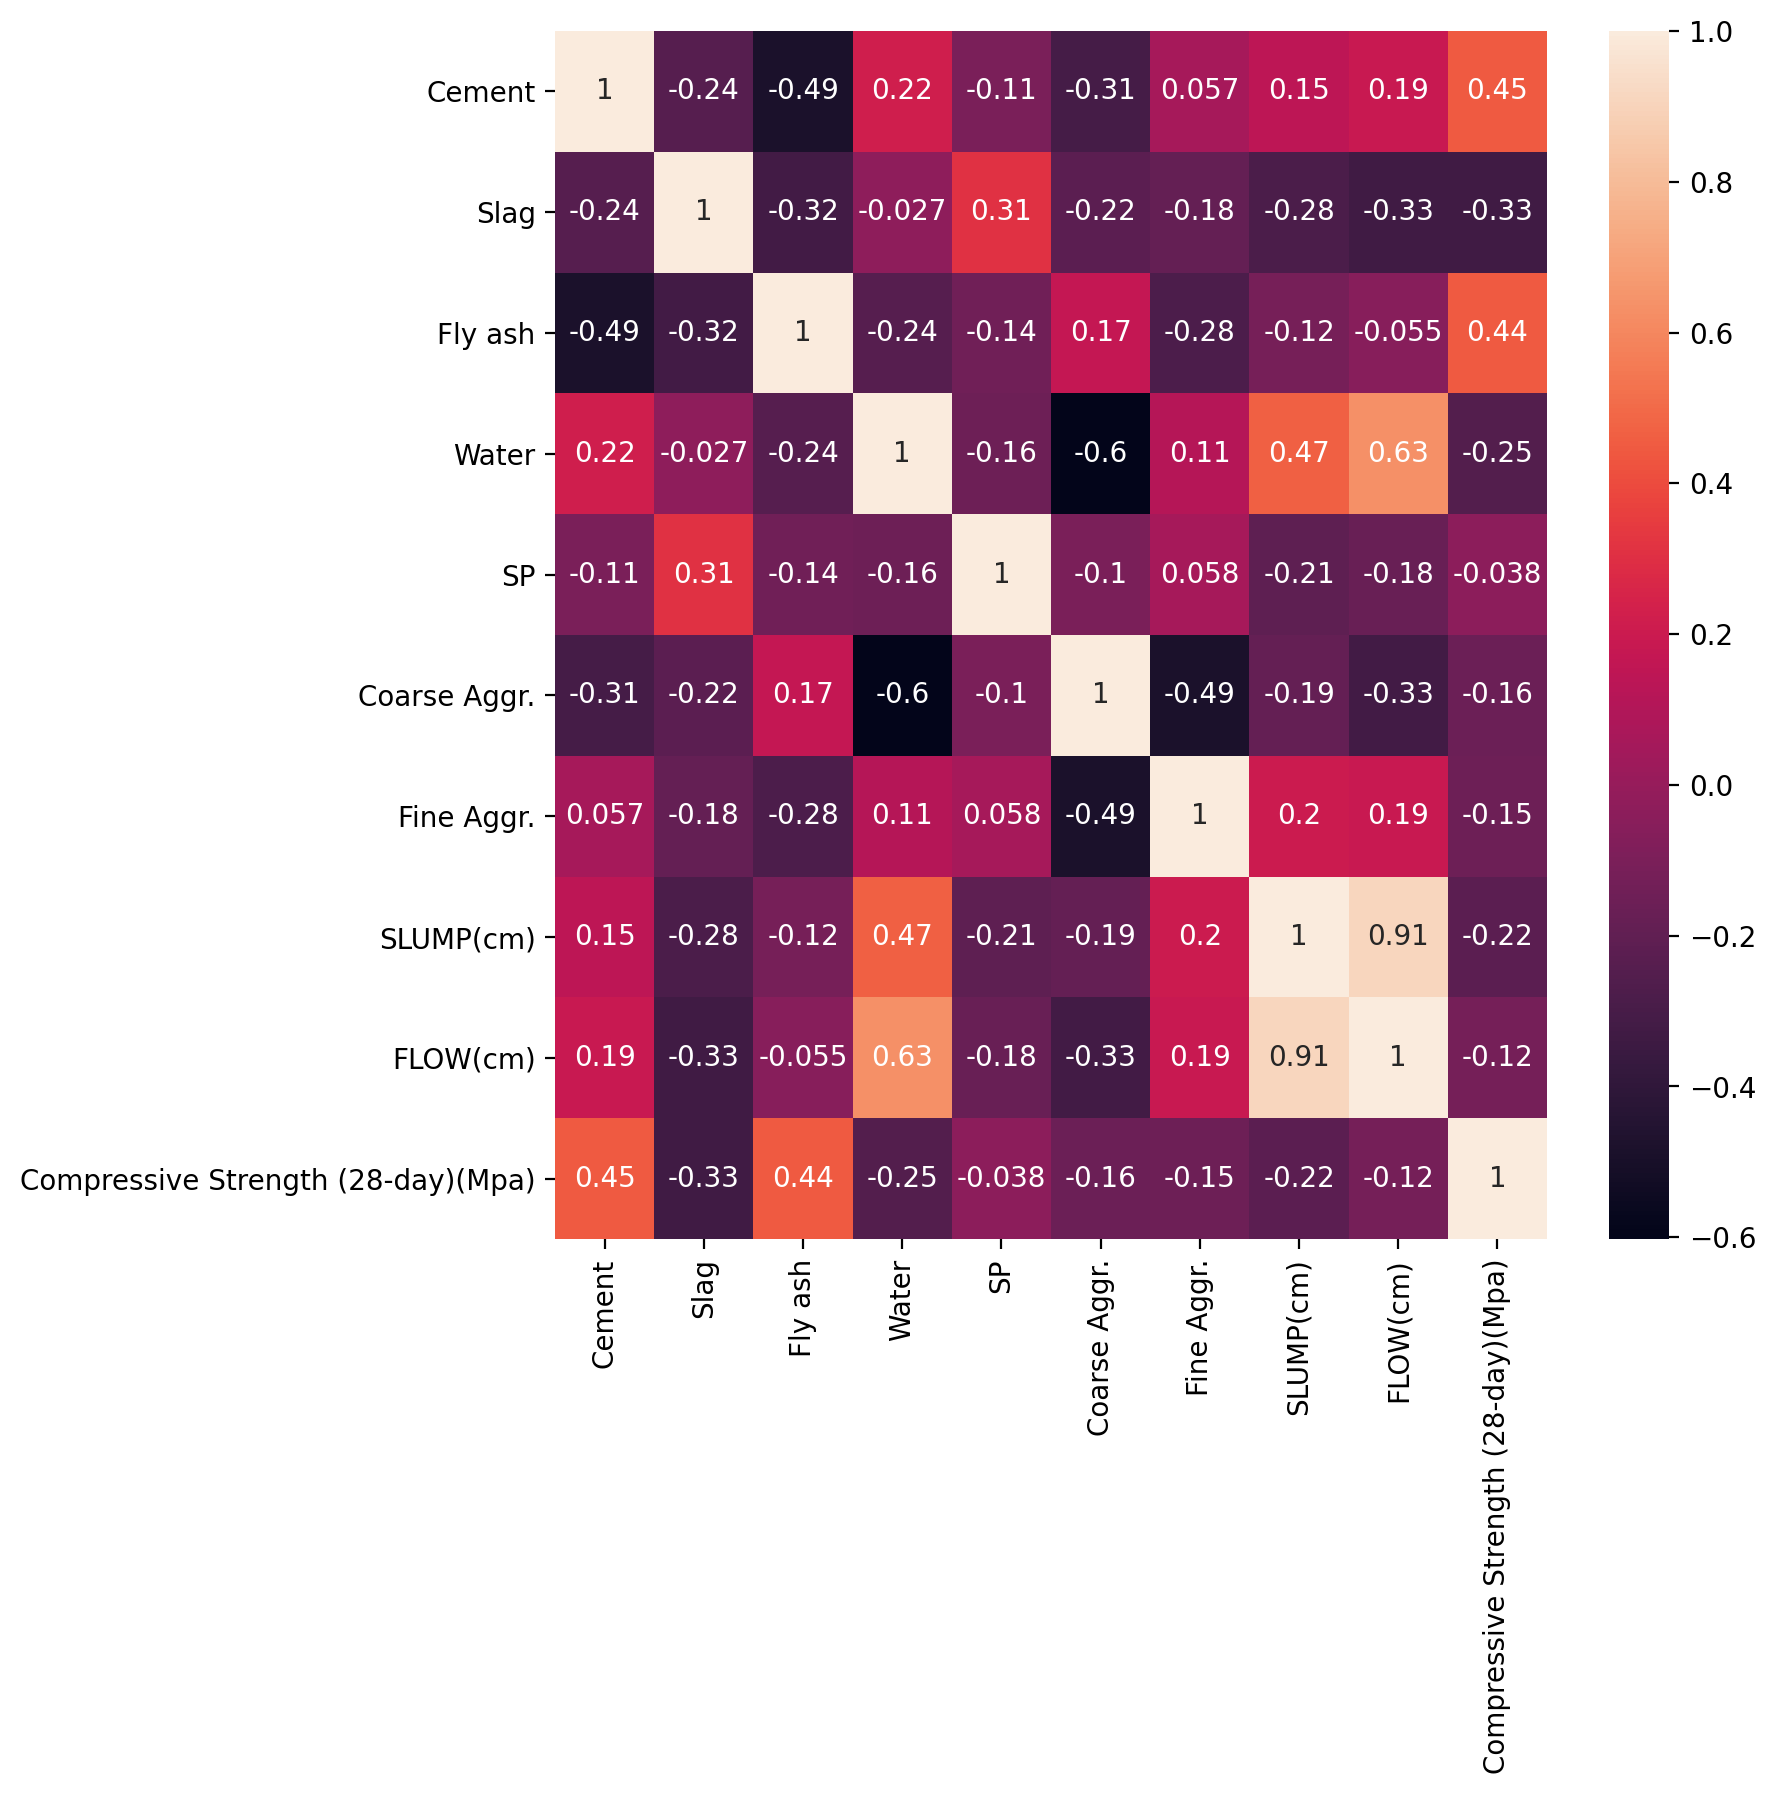

In [37]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [38]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [39]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [40]:
y = df['Compressive Strength (28-day)(Mpa)']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaled_X_train = scaler.fit_transform(X_train)

In [46]:
scaled_X_test = scaler.transform(X_test)

In [47]:
from sklearn.svm import SVR, LinearSVR

In [48]:
base_model = SVR()

In [49]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [53]:
base_preds = base_model.predict(scaled_X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
mean_absolute_error(y_test, base_preds)

5.236902091259179

In [58]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327133

In [59]:
y_test.mean()

36.26870967741935

In [60]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto'], 'degree': [2,3,4], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
svr = SVR()

In [64]:
grid = GridSearchCV(svr, param_grid)

In [65]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [66]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [67]:
grid_pred = grid.predict(scaled_X_test)

In [68]:
mean_absolute_error(y_test, grid_pred)

2.512801221076198

In [70]:
np.sqrt(mean_squared_error(y_test, grid_pred))

3.1782103051198347